In [134]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from natsort import natsorted
import re
import plotly.graph_objs as go
from plotly.offline import iplot

np.set_printoptions(threshold=sys.maxsize)
# Load the pickle file into a DataFrame
data = pd.read_pickle('ad-chega.pkl')






In [135]:
#The Object deteection column 

countPessoa = 0
countTie = 0
countbottle = 0
countTv = 0
countWine = 0
countUmbrella = 0
countTrain = 0
countBowl = 0
countTable = 0
countChair = 0
countBooks = 0

unique_objects = set()

for i in range(0,2367):
        
        Data_objects = np.array(data.iloc[i,1])
        
        for j in range(0, len(Data_objects)):
               
               unique_objects.add(Data_objects[j][4])

               if Data_objects[j][4] == 'person':
                    countPessoa += 1
               elif Data_objects[j][4] == 'tie':
                    countTie += 1
               elif Data_objects[j][4] == 'bottle':
                    countbottle += 1
               elif Data_objects[j][4] == 'tv':
                    countTv += 1
               elif Data_objects[j][4] == 'wine glass':
                    countWine += 1
               elif Data_objects[j][4] == 'umbrella':
                    countUmbrella += 1
               elif Data_objects[j][4] == 'train':
                    countTrain += 1
               elif Data_objects[j][4] == 'bowl':
                    countBowl += 1
               elif Data_objects[j][4] == 'dining table':
                    countTable += 1
               elif Data_objects[j][4] == 'chair':
                    countChair += 1
               elif Data_objects[j][4] == 'book':
                    countBooks += 1
               


    

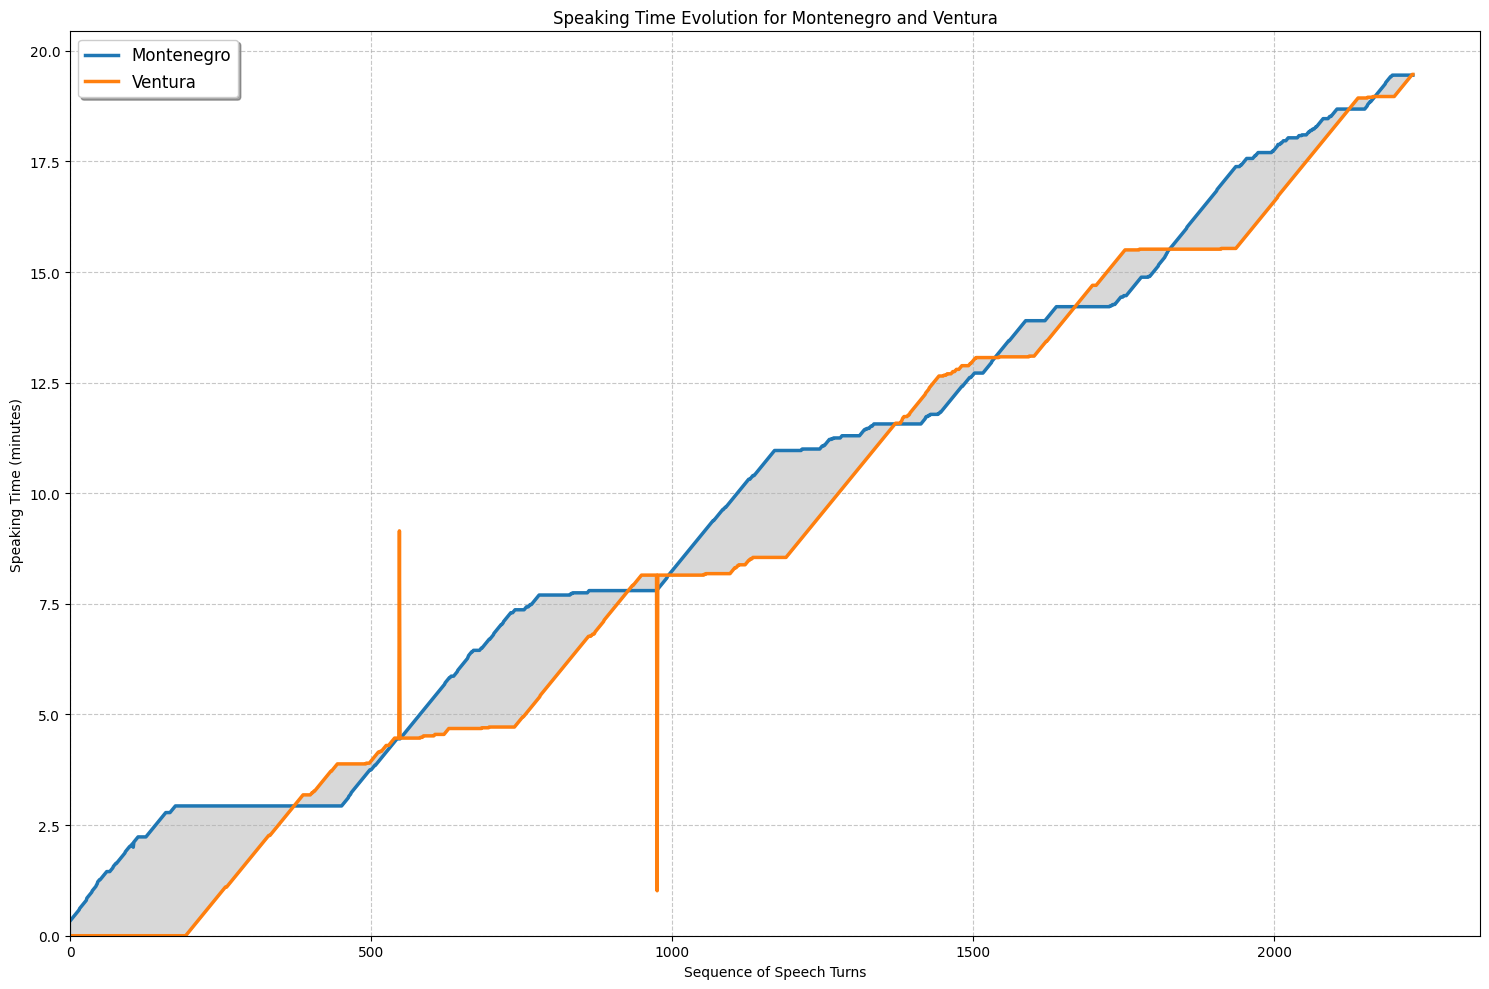

In [136]:
#Analyse and clean text


def time_str_to_float(time_str):
    # Split the string on the period to separate minutes and seconds
    minutes_str, seconds_str = time_str.split('.')
    # Convert strings to integer and float, respectively
    minutes = int(minutes_str)
    seconds = float(seconds_str)
    # Convert seconds to a fraction of a minute
    seconds_fraction = seconds / 60.0
    # Return as float
    return minutes + seconds_fraction

def clean_time_string(t):
   
    return t.replace('I', '1').replace('O', '0').replace('l', '1').replace('o', '0')

#first lets order the images

data = data.sort_values(by='filename')


pd.set_option('display.max_rows', None)

pattern_mo = r'\bMO\w+\b'

pattern_v = r'\bv\w+\b'

count = 0

Used_list = []


# Iterate over the rows of the DataFrame starting from index 73
for i in range(73, len(data)):

    # Extract the list from the specified column
    data_inside = data.iloc[i, 4]

    # Iterate over each string in the list
    for j in range(len(data_inside)):

        # Check if the pattern matches the string
        if re.search(pattern_mo, data_inside[j]):

            # If pattern is found, extract the current string and the next three strings
            desired_info = data_inside[j:j+4]  # Extract the next three strings

            # Translate "MO..." to "Montenegro" and "v..." to "Ventura"
            translated_info = []
            for item in desired_info:
                if re.match(pattern_mo, item):
                    translated_info.append("Montenegro")
                elif re.match(pattern_v, item):
                    translated_info.append("Ventura")
                else:
                    translated_info.append(item)

            # Append the translated_info to Used_list
            Used_list.append(translated_info)


# Filter out lists with exactly 4 objects
Used_list = [desired_info for desired_info in Used_list if len(desired_info) == 4]


# Initialize arrays to store Montenegro and Ventura times
montenegro_times = []
ventura_times = []

for list in Used_list:
 
    # Get the first two characters
    first_part_m = list[1][:2]

    # Get the last two characters
    second_part_m = list[1][-2:]

    first_part_v = list[2][:2]

    second_part_v = list[2][-2:]
    
     # Join the Montenegro parts with a period in the middle
    montenegro_time = f"{first_part_m}.{second_part_m}"

    # Join the Ventura parts with a period in the middle
    ventura_time = f"{first_part_v}.{second_part_v}"
    
    # Append the times to the arrays
    montenegro_times.append(montenegro_time)
    ventura_times.append(ventura_time)

# Apply cleaning to time strings
montenegro_times_cleaned = [clean_time_string(time) for time in montenegro_times]
ventura_times_cleaned = [clean_time_string(time) for time in ventura_times]

# Filter out any strings that contain 'VE'
montenegro_times_filtered = [time for time in montenegro_times_cleaned if 'VE' not in time]
ventura_times_filtered = [time for time in ventura_times_cleaned if 'VE' not in time]

# Filter out any strings that contain 'VE'
montenegro_times_filtered2 = [time for time in montenegro_times_filtered if 'AD' not in time]
ventura_times_filtered2 = [time for time in ventura_times_filtered if 'AD' not in time]

# Filter out any strings that contain 'VE'
montenegro_times_filtered3 = [time for time in montenegro_times_filtered2 if 'Ve' not in time]
ventura_times_filtered3 = [time for time in ventura_times_filtered2 if 'Ve' not in time]

# Filter out any strings that contain 'VE'
montenegro_times_filtered4 = [time for time in montenegro_times_filtered3 if 'ª' not in time]
ventura_times_filtered4 = [time for time in ventura_times_filtered3 if 'ª' not in time]

# Filter out any strings that contain 'VE'
montenegro_times_filtered5 = [time for time in montenegro_times_filtered4 if '[2' not in time]
ventura_times_filtered5 = [time for time in ventura_times_filtered4 if '[2' not in time]


# Now attempt the conversion again
montenegro_minutes = [time_str_to_float(time) for time in montenegro_times_filtered5]
ventura_minutes = [time_str_to_float(time) for time in ventura_times_filtered5]


# Plot the filtered Montenegro and all Ventura times with enhancements
plt.figure(figsize=(15, 10))  # Increase figure size
plt.plot(range(len(montenegro_minutes)), montenegro_minutes, label='Montenegro', linewidth=2.5)
plt.plot(range(len(ventura_minutes)), ventura_minutes, label='Ventura', linewidth=2.5)

# Add shaded area between the lines
plt.fill_between(range(len(montenegro_minutes)), montenegro_minutes, ventura_minutes, color='grey', alpha=0.3)

# Add labels and title with more description
plt.xlabel('Sequence of Speech Turns')
plt.ylabel('Speaking Time (minutes)')
plt.title('Speaking Time Evolution for Montenegro and Ventura')

# Enhance the legend
plt.legend(loc='upper left', fontsize='large', frameon=True, shadow=True)

# Show the plot with an enhanced grid for better readability and axis range adjustment
plt.grid(True, linestyle='--', alpha=0.7)  # Enhanced grid visibility
plt.xlim(left=0)  # Set the starting point of x-axis to zero
plt.ylim(bottom=0)  # Set the starting point of y-axis to zero

plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()




        


    

Now Lets do the same for the other debates. Lets use a calmer debate, like BE and Livre  --> DOESN´T HAVE TEXT!
                                                                           BE and PAN ---> NO TEXT!


JUST THE DEBATES ON RTP HAVE THE TIME!!!!

LIVRE - PS


In [137]:
# Load the pickle file into a DataFrame
data = pd.read_pickle('livre-ps.pkl')

print(data.iloc[:, 4])

0           [523, [2924, NUNEBRQTOS, 00:000O:54, TARHRES]
1             [826241, NUNEBRQTOS, 11:40, 11.33, TARHRES]
2          [23, 82624, NUNEBRQTOS, 03.51, 03.49, TARHRES]
3       [=3, ª, NUNEBRPTOS, 01.35, 01.28, TARHRES, 9, ...
4         [3, 0 ), 2124, NUNEBRQTOS, 00:000O:12, TARURES]
5             [3, 2124, NUNEBROTOS, 00:00IOO:19, TARHRES]
6       [0), RUI TAVARES, Livre, 224, NUNPEBRQTOS, 13....
7          [0)7, NUNEBRQTOS, 10.38, 09.42, TARURES, 2624]
8         [=3, 826241, NUNEBRPTOS, 13.51, 13.04, TARHRES]
9                [=3, n, DIREÇÃO DE INFORMAÇÃO, RTP 2024]
10          [[2624, NUNSBRPTOS, 05,45, 05.26, TARHRES, 2]
11       [=3, 1, NUNEBRBTOS, 06.44, 05.27, TARHRES, 2924]
12          [9), 2124, NUNEBRQTOS, 08.22, 07-45, TARHRES]
13          [1, {2124, NUNEBRQTOS, 10.38, 10.01, TARHRES]
14          [0), 2124, NUNEBRQTOS, 13.35, 12.09, TARHRES]
15         [=3, 82624, NUNEBRBTOS, 11-48, 11.33, TARURES]
16       [3, 0), 2124, NUNEBRQTOS, 10.38, 09.34, TARHRES]
17        [728

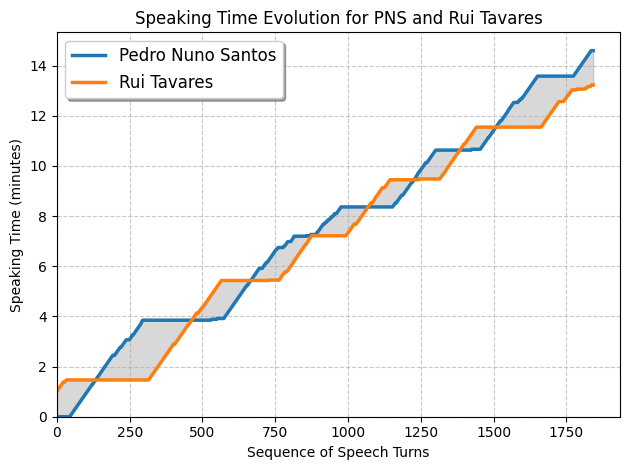

In [138]:
#Analyse and clean text

def time_str_to_float(time_str):
    # Split the string on the period to separate minutes and seconds
    minutes_str, seconds_str = time_str.split('.')
    # Convert strings to integer and float, respectively
    minutes = int(minutes_str)
    seconds = float(seconds_str)
    # Convert seconds to a fraction of a minute
    seconds_fraction = seconds / 60.0
    # Return as float
    return minutes + seconds_fraction

#first lets order the images

data = data.sort_values(by='filename')


pd.set_option('display.max_rows', None)

pattern_n = r'\bNUN\w+\b'

pattern_T = r'\bTA\w+\b'

count = 0

Used_list = []


# Iterate over the rows of the DataFrame starting from index 73
for i in range(122, len(data)):

    # Extract the list from the specified column
    data_inside = data.iloc[i, 4]

    # Iterate over each string in the list
    for j in range(len(data_inside)):

        # Check if the pattern matches the string
        if re.search(pattern_n, data_inside[j]):
            

            # If pattern is found, extract the current string and the next three strings
            desired_info = data_inside[j:j+4]  # Extract the next three strings

            translated_info = []
            for item in desired_info:
                if re.match(pattern_n, item):
                    translated_info.append("Pedro Nuno Santos")
                elif re.match(pattern_T, item):
                    translated_info.append("Rui Tavares")
                else:
                    translated_info.append(item)

            # Append the translated_info to Used_list
            Used_list.append(translated_info)


# Filter out lists with exactly 4 objects
Used_list = [desired_info for desired_info in Used_list if len(desired_info) == 4]

Used_list = [sublist for sublist in Used_list if "PEDRO NUNO SANTOS" not in sublist]


# Initialize arrays to store Montenegro and Ventura times
PNS_times = []
Rui_times = []


for list in Used_list:
 
    # Get the first two characters
    first_part_m = list[1][:2]

    # Get the last two characters
    second_part_m = list[1][-2:]

    first_part_v = list[2][:2]

    second_part_v = list[2][-2:]
    
     # Join the Montenegro parts with a period in the middle
    PNS_time = f"{first_part_m}.{second_part_m}"

    # Join the Ventura parts with a period in the middle
    Rui_time = f"{first_part_v}.{second_part_v}"
    
    # Append the times to the arrays
    PNS_times.append(PNS_time)
    Rui_times.append(Rui_time)


PNS_times = [time.replace('O', '0').replace('I', '1').replace('l', '1') for time in PNS_times]
Rui_times = [time.replace('O', '0').replace('I', '1').replace('l', '1') for time in Rui_times]



# Filter out any strings that contain 'Ru'
PNS_times_filtered = [time for time in PNS_times if 'Ru' not in time]
Rui_times_filtered = [time for time in Rui_times if 'Ru' not in time]

# Filter out any strings that contain '1q'
Rui_times_filtered1 = [time for time in Rui_times_filtered if '1q' not in time]


# Now the conversion again
PNS_minutes = [time_str_to_float(time) for time in PNS_times_filtered]
Rui_minutes = [time_str_to_float(time) for time in Rui_times_filtered1]


# Plot the filtered Montenegro and all Ventura times with enhancements
plt.figure()  # Increase figure size
plt.plot(range(len(PNS_minutes)), PNS_minutes, label='Pedro Nuno Santos', linewidth=2.5)
plt.plot(range(len(Rui_minutes)), Rui_minutes, label='Rui Tavares', linewidth=2.5)

# Add shaded area between the lines
plt.fill_between(range(len(PNS_minutes)), PNS_minutes, Rui_minutes, color='grey', alpha=0.3)

# Add labels and title with more description
plt.xlabel('Sequence of Speech Turns')
plt.ylabel('Speaking Time (minutes)')
plt.title('Speaking Time Evolution for PNS and Rui Tavares')

# Enhance the legend
plt.legend(loc='upper left', fontsize='large', frameon=True, shadow=True)

# Show the plot with an enhanced grid for better readability and axis range adjustment
plt.grid(True, linestyle='--', alpha=0.7)  # Enhanced grid visibility
plt.xlim(left=0)  # Set the starting point of x-axis to zero
plt.ylim(bottom=0)  # Set the starting point of y-axis to zero

plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()





BE - PS

In [139]:
# Load the pickle file into a DataFrame
data = pd.read_pickle('be-ps.pkl')

print(data.iloc[:, 4])

0       [3, 0), 9, 22, MORRAAA, 00:0010O:58, NUNEBRQTOs ]
1        [9, @, 2524, MORRIAGA, 11.27, 10.51, NUNEBRBTOS]
2               [221, MORRAGA, 03.14, 03.47, NUNPEBRQTOS]
3            [=3, 82624, MRRAGA, 01:36, 0121, NUNEBRQTOS]
4       [3, 1 ), 2, @, MORRAGA, 00:0000.23, NUNPEBRPTo...
5       [424, SLATIVAS, 9, MRRAGA, 00:000O:30, NUNEBRO...
6                [MORRAGA, 11.27, 13.04 NuNfEBRBTos, 7al]
7           [73, 224, MORRAGA, 09.28, 10.07, NUNEBROTOs ]
8            [2, 224, MORRAGA, 12.22, 13.59, NUNPEBRPTOS]
9                [22, MORRIAAA, 13.31, 14:00, NUNEBROTOS]
10           [3, 8262, MORRAAA, 14-27, 15.06, NUNEBRQTOS]
11        [3, 2124, MORRAAUA, 05.43, 04:14, NUNPEBRPTos ]
12      [=3, 9, 5, 12024, MORRAGA, 05.43, 05.22, NUNEB...
13       [=3, MPARIAGA, 07.58, 06.59, NUNPEBRPTos , 2424]
14            [=3, 27, MARAGHA, 09.47, 1011, NUNEBROTOs ]
15              [22, MPRRAAA, 11.27, 13.33, NUNPEBRPTos ]
16               [224, MPRRIAGA, 1127, 10.51, NUNEBRQTOS]
17          [7

['00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', '00.00', 'BE.BE', '00.01', 'BE.BE', '00.02', 'BE.BE', '00.03', 'BE.BE', '00.04', 'BE.BE', '00.05', '00.06', '00.07', '00.08', '00.09', '00.10', '00.11', '00.12', '00.13', '00.14', '00.15', '00.16', '00.17', '00.18', '00.19', '00.20', '00.21', '00.22', '00.23', '00.24', '00.25', '00.26', '00.27', '00.28', '00.29', 'PE.R0', '00.30', '00.31', '00.32', '00.33', '00.34', '00.35', '00.36', '00.37', '00.38', '00.39', '00.39', '00.39', '00.39', '00.39', '00.39', '00.39', '00.39', '00.39', '00.40', '00.41', '00.42', '00.43', '00.44', '00.45', '00.46', '00.47', '00.48', '00.49', '00.50', '00.51', '00.52', '00.53', '00.54', '00.55', '00.56', '00.57', '00.58', '00.59', '01.00', 

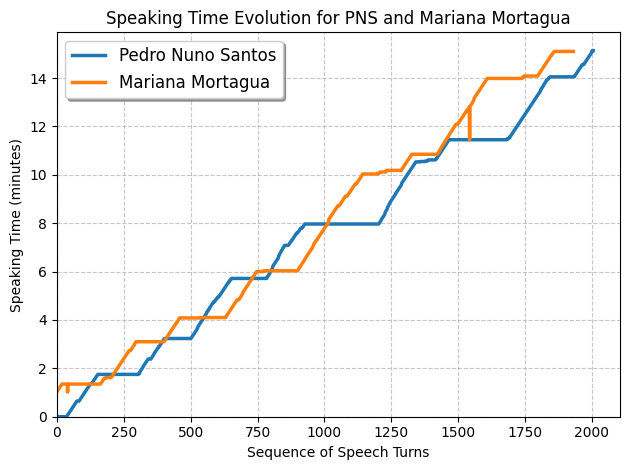

In [140]:
#Analyse and clean text

def time_str_to_float(time_str):
    # Split the string on the period to separate minutes and seconds
    minutes_str, seconds_str = time_str.split('.')
    # Convert strings to integer and float, respectively
    minutes = int(minutes_str)
    seconds = float(seconds_str)
    # Convert seconds to a fraction of a minute
    seconds_fraction = seconds / 60.0
    # Return as float
    return minutes + seconds_fraction

#first lets order the images

data = data.sort_values(by='filename')


pd.set_option('display.max_rows', None)


count = 0


pattern_n = r'\bN\w+\b'

pattern_m = r'\bM\w+\b'

count = 0

Used_list = []


# Iterate over the rows of the DataFrame starting from index 73
for i in range(119, len(data)):

    # Extract the list from the specified column
    data_inside = data.iloc[i, 4]

    # Iterate over each string in the list
    for j in range(len(data_inside)):

        # Check if the pattern matches the string
        if re.search(pattern_m, data_inside[j]):
            

            # If pattern is found, extract the current string and the next three strings
            desired_info = data_inside[j:j+4]  # Extract the next three strings

            # Translate "MO..." to "Montenegro" and "v..." to "Ventura"
            translated_info = []
            for item in desired_info:
                if re.match(pattern_m, item):
                    translated_info.append("Mariana Mortágua")
                elif re.match(pattern_n, item):
                    translated_info.append("Pedro Nuno Santos")
                else:
                    translated_info.append(item)

            # Append the translated_info to Used_list
            Used_list.append(translated_info)


# Filter out lists with exactly 4 objects
Used_list = [desired_info for desired_info in Used_list if len(desired_info) == 4]

Used_list = [sublist for sublist in Used_list if "PEDRO NUNO SANTOS" not in sublist]


# Initialize arrays to store Montenegro and Ventura times
PNS_times2 = []
Mortagua_times = []


for list in Used_list:
 
    # Get the first two characters
    first_part_m = list[1][:2]

    # Get the last two characters
    second_part_m = list[1][-2:]

    first_part_v = list[2][:2]

    second_part_v = list[2][-2:]
    
     # Join the PNS parts with a period in the middle
    PNS_time1 = f"{first_part_m}.{second_part_m}"

    # Join the Mortagua parts with a period in the middle
    Mortagua_time = f"{first_part_v}.{second_part_v}"
    
    # Append the times to the arrays
    PNS_times2.append(PNS_time1)
    Mortagua_times.append(Mortagua_time)


PNS_times2 = [time.replace('O', '0').replace('I', '1').replace('l', '1') for time in PNS_times2]
Mortagua_times = [time.replace('O', '0').replace('I', '1').replace('l', '1') for time in Mortagua_times]

print(PNS_times2)
print(Mortagua_times)

PNS_times_filtered1 = [time for time in PNS_times2 if 'BE' not in time and 'PE' not in time and 'Pe' not in time and 'Ma' not in time]
Mortagua_times_filtered = [time for time in Mortagua_times if 'Ru' not in time and 'os' not in time and 'oS' not in  time and '0S' not in time and ' |' not in time and ' /' not in time and 's ' not in time and ' !' not in time and 'Ma' not in time and 's_' not in time and '1b' not in time]

print(PNS_times_filtered1)
print(Mortagua_times_filtered)

# Now the conversion again
PNS_minutes_filtered2 = [time_str_to_float(time) for time in PNS_times_filtered1]
Mortagua_minutes_filtered = [time_str_to_float(time) for time in Mortagua_times_filtered]


#############################################  Outliers Detection  #############################################

# New lists to store the filtered results
PNS_minutes_filtered2_no_outliers = []
Mortagua_minutes_filtered_no_outliers = []

for index, time in enumerate(Mortagua_minutes_filtered):
    if index < 500 and time <= 6:
        Mortagua_minutes_filtered_no_outliers.append(time)
    elif 500 <= index < 1000:
        Mortagua_minutes_filtered_no_outliers.append(time)
    elif 1000 <= index < 1250 and time >= 6:
        Mortagua_minutes_filtered_no_outliers.append(time)
    elif index >= 1250:
        Mortagua_minutes_filtered_no_outliers.append(time)


####################################### Plot the Filtered Data with Outliers Removed  #######################################


# Plot the filtered Montenegro and all Ventura times with enhancements
plt.figure()  # Increase figure size
plt.plot(range(len(PNS_minutes_filtered2)), PNS_minutes_filtered2, label='Pedro Nuno Santos', linewidth=2.5)
plt.plot(range(len(Mortagua_minutes_filtered_no_outliers)), Mortagua_minutes_filtered_no_outliers, label='Mariana Mortagua', linewidth=2.5)


# Add labels and title with more description
plt.xlabel('Sequence of Speech Turns')
plt.ylabel('Speaking Time (minutes)')
plt.title('Speaking Time Evolution for PNS and Mariana Mortagua')

# Enhance the legend
plt.legend(loc='upper left', fontsize='large', frameon=True, shadow=True)

# Show the plot with an enhanced grid for better readability and axis range adjustment
plt.grid(True, linestyle='--', alpha=0.7)  # Enhanced grid visibility
plt.xlim(left=0)  # Set the starting point of x-axis to zero
plt.ylim(bottom=0)  # Set the starting point of y-axis to zero

plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()


NOW CHEGA VS BE

In [141]:
# Load the pickle file into a DataFrame
data = pd.read_pickle('chega-be.pkl')





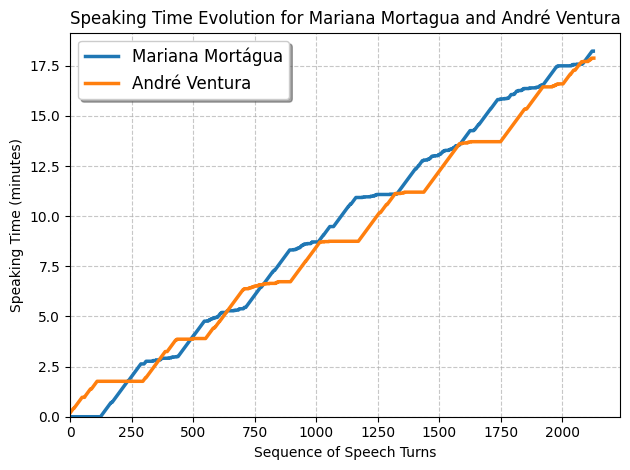

In [142]:
#Analyse and clean text

def time_str_to_float(time_str):
    # Split the string on the period to separate minutes and seconds
    minutes_str, seconds_str = time_str.split('.')
    # Convert strings to integer and float, respectively
    minutes = int(minutes_str)
    seconds = float(seconds_str)
    # Convert seconds to a fraction of a minute
    seconds_fraction = seconds / 60.0
    # Return as float
    return minutes + seconds_fraction

#first lets order the images

data = data.sort_values(by='filename')

count = 0
'''
for i in range(len(data)):
    count = count +1
    print("count: " + str(count) + " data: " + str(data.iloc[i, 4]))
'''
pd.set_option('display.max_rows', None)



Used_list = []


# Iterate over the rows of the DataFrame starting from index 73
for i in range(53, 2184):

    # Extract the list from the specified column
    data_inside = data.iloc[i, 4]

    # Iterate over each string in the list
    for j in range(len(data_inside)):

        # Check if the pattern matches the string
        if re.search(pattern_m, data_inside[j]):
            

            # If pattern is found, extract the current string and the next three strings
            desired_info = data_inside[j:j+4]  # Extract the next three strings

            # Translate "MO..." to "Montenegro" and "v..." to "Ventura"
            translated_info = []
            for item in desired_info:
                if re.match(pattern_m, item):
                    translated_info.append("Mariana Mortágua")
                elif re.match(pattern_v, item):
                    translated_info.append("André Ventura")
                else:
                    translated_info.append(item)

            # Append the translated_info to Used_list
            Used_list.append(translated_info)


# Filter out lists with exactly 4 objects
Used_list = [desired_info for desired_info in Used_list if len(desired_info) == 4]


# Initialize arrays to store Montenegro and Ventura times
Andre_times = []
Mariana_times = []


for list in Used_list:
 
    # Get the first two characters
    first_part_m = list[1][:2]

    # Get the last two characters
    second_part_m = list[1][-2:]

    first_part_v = list[2][:2]

    second_part_v = list[2][-2:]
    
     # Join the PNS parts with a period in the middle
    Andre_time = f"{first_part_m}.{second_part_m}"

    # Join the Mortagua parts with a period in the middle
    Mariana_time = f"{first_part_v}.{second_part_v}"
    
    # Append the times to the arrays
    Mariana_times.append(Mariana_time)
    Andre_times.append(Andre_time)


Mariana_times = [time.replace('O', '0').replace('I', '1').replace('l', '1') for time in Mariana_times]
Andre_times = [time.replace('O', '0').replace('I', '1').replace('l', '1') for time in Andre_times]


Mariana_times_filtered = [time for time in Mariana_times if '{2' not in time and '[2' not in time and '0]' not in time and '@' not in time and 'BE' not in time]
Andre_times_filtered = [time for time in Andre_times if 'BE' not in time and 'AN' not in time ]


Mariana_minutes_filtered = [time_str_to_float(time) for time in Mariana_times_filtered]
Andre_minutes_filtered = [time_str_to_float(time) for time in Andre_times_filtered]


#############################################  Outliers Detection  #############################################
# New lists to store the filtered results
Mariana_minutes_filtered_no_outliers = []

for index, time in enumerate(Mariana_minutes_filtered):
    if index < 1000:
        Mariana_minutes_filtered_no_outliers.append(time)
    elif 1000 <= index < 1250 and time <= 15 and time >= 5:
        Mariana_minutes_filtered_no_outliers.append(time)
    elif index >= 1250 :
        Mariana_minutes_filtered_no_outliers.append(time)
   

####################################### Plot the Filtered Data with Outliers Removed  #######################################


# Plot the filtered Montenegro and all Ventura times with enhancements
plt.figure()  # Increase figure size
plt.plot(range(len(Mariana_minutes_filtered_no_outliers)), Mariana_minutes_filtered_no_outliers, label='Mariana Mortágua', linewidth=2.5)
plt.plot(range(len(Andre_minutes_filtered)), Andre_minutes_filtered, label='André Ventura', linewidth=2.5)


# Add labels and title with more description
plt.xlabel('Sequence of Speech Turns')
plt.ylabel('Speaking Time (minutes)')
plt.title('Speaking Time Evolution for Mariana Mortagua and André Ventura')

# Enhance the legend
plt.legend(loc='upper left', fontsize='large', frameon=True, shadow=True)

# Show the plot with an enhanced grid for better readability and axis range adjustment
plt.grid(True, linestyle='--', alpha=0.7)  # Enhanced grid visibility
plt.xlim(left=0)  # Set the starting point of x-axis to zero
plt.ylim(bottom=0)  # Set the starting point of y-axis to zero

plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

